In fine-tuning transfer learning the pre-trained model weights from another model are unfrozen and tweaked during to better suit your own data.

In [1]:
from datetime import datetime
now = datetime.now()

In [2]:
now.strftime("%d/%m/%Y %H:%M:%S")

'25/08/2023 07:32:02'

In [3]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [4]:
!nvidia-smi

Fri Aug 25 07:32:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Great...! We are now running on Tesla T4 GPU

# Gettin Helper Functions

We will use this helper_functions file to use helper functions required for this projects

In [5]:
!wget https://raw.githubusercontent.com/nikbhaladhare2104/TensorFlow-Extraa/TensorFlow/helper_functions.py

--2023-08-25 07:32:05--  https://raw.githubusercontent.com/nikbhaladhare2104/TensorFlow-Extraa/TensorFlow/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17411 (17K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  17.00K  --.-KB/s    in 0s      

2023-08-25 07:32:06 (112 MB/s) - ‘helper_functions.py’ saved [17411/17411]



# 10 Food Classes: Working with less data

In [6]:
# Get 10% of the data of the 10 classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-08-25 07:32:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 64.233.170.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  21.3MB/s    in 8.6s    

2023-08-25 07:32:15 (18.7 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [7]:
# Getting unzip_data, walk_through_dir function from helper_functions
from helper_functions import unzip_data, walk_through_dir

In [8]:
unzip_data("10_food_classes_10_percent.zip")

In [9]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/c

We can see that each of the training directories contain 75 images and each of the testing directories contain 250 images.



In [10]:
# set train and test dir path
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

We will be using [tf.keras.prepreprocessing.image_dataset_from_directory()](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory) rather than  **ImageDataGenerator**.

One of the main benefits of using **tf.keras.prepreprocessing.image_dataset_from_directory()** rather than **ImageDataGenerator** is that it creates a [tf.data.Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) object rather than a generator.

## Create data inputs


In [11]:
import tensorflow as tf
IMAGE_SIZE = (224, 224) #We will build our model such that it will only accept images of size(224, 224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size= IMAGE_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size= 32,
                                                                            )



Found 750 files belonging to 10 classes.


In [12]:
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMAGE_SIZE,
                                                                           label_mode="categorical",
                                                                           batch_size=32)

Found 2500 files belonging to 10 classes.


In [13]:
# check training data
train_data_10_percent

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [14]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

Or if we wanted to see an example batch of data, we could use the take() method.



In [15]:
# See an example batch of data
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[7.03010178e+01 1.64015305e+02 2.08571426e+02]
   [1.10091843e+02 1.97306122e+02 2.25260193e+02]
   [1.18071426e+02 1.99642868e+02 2.11428574e+02]
   ...
   [1.97005096e+02 2.07219360e+02 7.68621521e+01]
   [1.92857132e+02 2.00928574e+02 6.26223946e+01]
   [1.93000076e+02 2.02000076e+02 5.82857132e+01]]

  [[4.67908211e+01 1.42219391e+02 1.89959183e+02]
   [9.16377640e+01 1.80857147e+02 2.11642853e+02]
   [1.03168373e+02 1.84826538e+02 1.98295929e+02]
   ...
   [1.93372406e+02 2.03586670e+02 7.12141571e+01]
   [1.86010208e+02 1.97010208e+02 5.79438553e+01]
   [1.89882721e+02 2.01811295e+02 5.81174126e+01]]

  [[3.69948997e+01 1.34137756e+02 1.90132660e+02]
   [7.88163300e+01 1.68943893e+02 2.04056122e+02]
   [8.79285736e+01 1.70714294e+02 1.87045914e+02]
   ...
   [1.91857071e+02 2.03474426e+02 6.97805328e+01]
   [1.87714310e+02 1.97928604e+02 6.22704315e+01]
   [1.95214386e+02 2.05428680e+02 6.94184570e+01]]

  ...

  [[2.26285736e+02 2.20285736e+02 2.06285736e+02]
   [2

#Model 0: Building a transfer learning model using the Keras Functional API

## Creating base model

In [16]:
# creating base model
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

24274472/24274472 [==============================] - 3s 0us/step


In [17]:
# FReeze the base model so that it will be untrainable
base_model.trainable = False

In [18]:
# Inputs for the base model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="Input layer")

In [19]:
# passing the inputs to the base_model
x = base_model(inputs)
print(f"Shape after base_model: {x.shape}")


Shape after base_model: (None, 7, 7, 1280)


In [20]:
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

After GlobalAveragePooling2D(): (None, 1280)


In [21]:
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

## Creating the model_0

In [22]:
from helper_functions import create_tensorboard_callback

In [23]:
model_0 = tf.keras.Model(inputs, outputs)

# compile the model
model_0.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_0_10_percent = model_0.fit(train_data_10_percent,
                                   epochs=5,
                                   steps_per_epoch=len(train_data_10_percent),
                                   validation_data=test_data_10_percent,
                                   # Go through less of the validation data so epochs are faster (we want faster experiments!)
                                   validation_steps=int(0.25*len(test_data_10_percent)),
                                   callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extraction")]
                                   )

Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20230825-073239
Epoch 1/5
24/24 [==============================] - 29s 512ms/step - loss: 1.9074 - accuracy: 0.4080 - val_loss: 1.3593 - val_accuracy: 0.7204
Epoch 2/5
24/24 [==============================] - 9s 343ms/step - loss: 1.1685 - accuracy: 0.7413 - val_loss: 0.9490 - val_accuracy: 0.7796
Epoch 3/5
24/24 [==============================] - 5s 180ms/step - loss: 0.8586 - accuracy: 0.8080 - val_loss: 0.7516 - val_accuracy: 0.8257
Epoch 4/5
24/24 [==============================] - 7s 293ms/step - loss: 0.6985 - accuracy: 0.8440 - val_loss: 0.6270 - val_accuracy: 0.8553
Epoch 5/5
24/24 [==============================] - 5s 180ms/step - loss: 0.6140 - accuracy: 0.8587 - val_loss: 0.5786 - val_accuracy: 0.8536


Vow...! Almost 85% accuracy on 10% of data

In [24]:
# Check layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 block

In [25]:
base_model.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   0           ['rescaling[0][0]']              
                                3)                                                

We can see how each of the different layers have a certain number of parameters each. Since we are using a pre-trained model, you can think of all of these parameters are patterns the base model has learned on another dataset. And because we set **base_model.trainable = False**, these patterns remain as they are during training (they're frozen and don't get updated).

In [26]:
# Check summary of model constructed with Functional API
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5,932,122
Trainable params: 12,810
Non-trainable params: 5,919,312
_________________________________________________________________


How do our model's training curves look?

In [27]:
from helper_functions import plot_loss_curves

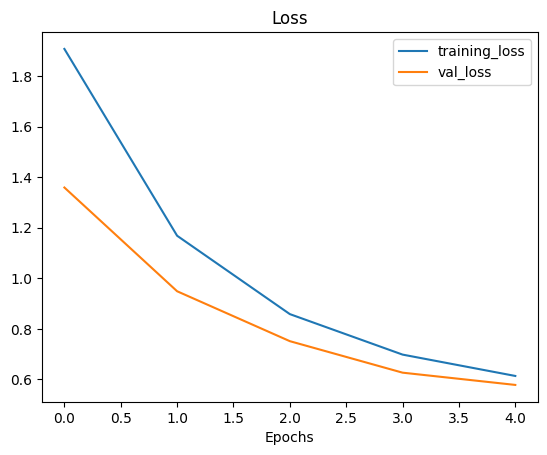

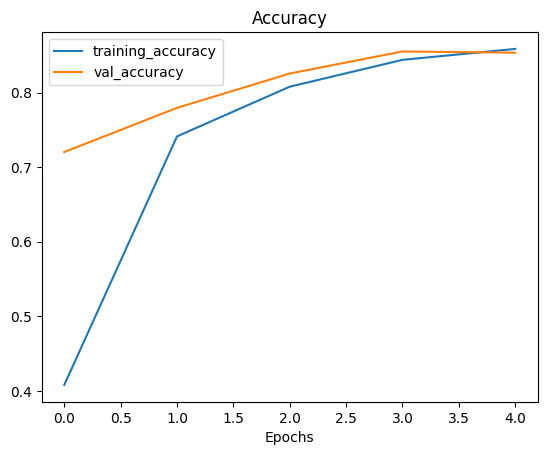

In [28]:
plot_loss_curves(history_0_10_percent)

The tf.keras.layers.GlobalAveragePooling2D() layer transforms a 4D tensor into a 2D tensor by averaging the values across the inner-axes.

It converges all the important (high weighted) features from 4D.

We can replicate this operation using the tf.reduce_mean() operation and specifying the appropriate axes.



#Running a series of transfer learning experiments

## Model 1: Using feature extraction transfer learning on 1% of the training data with data augmentation.


In [29]:
# Downloading and unzipping the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2023-08-25 07:33:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  21.9MB/s    in 7.3s    

2023-08-25 07:33:47 (17.5 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [30]:
unzip_data("10_food_classes_1_percent.zip")

In [31]:
# Setting dir path
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir_1_percent = "10_food_classes_1_percent/test/"

In [32]:
# walk through dir
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There a

###Preprocessing the data


In [33]:
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode="categorical",
                                                                           image_size=IMAGE_SIZE,
                                                                           batch_size=32)

test_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir_1_percent,
                                                                          label_mode="categorical",
                                                                          batch_size=32,
                                                                          image_size=IMAGE_SIZE
                                                                          )

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


###Adding data augmentation right into the model

In [34]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
], name ="data_augmentation")


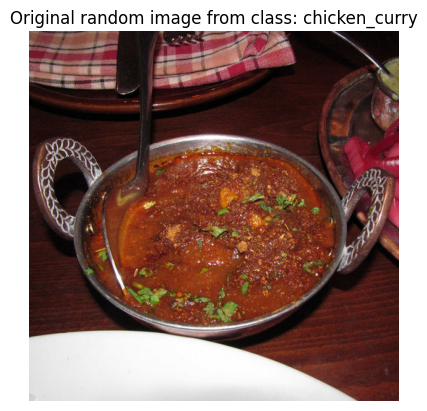

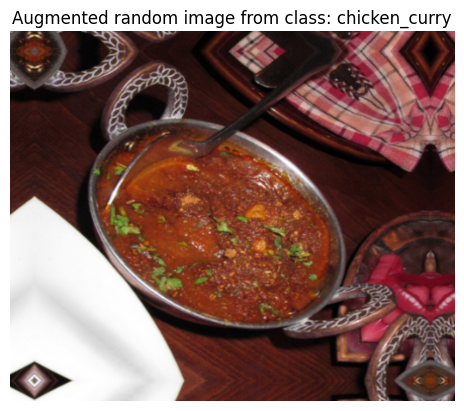

In [35]:
# view a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image
img = mpimg.imread(random_image_path) # read in the chosen target image
plt.imshow(img)
plt.title(f"Original random image from class: {target_class}")
plt.axis(False);


# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

### Creating the model_1


In [36]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="input_layer")

x = data_augmentation(inputs)

x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [37]:
# Fit the modle
history_1_1_percent = model_1.fit(train_data_1_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_1_percent),
                                  validation_data=test_data_1_percent,
                                  validation_steps=0.25*len(test_data_1_percent),
                                  callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")])


Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20230825-073354
Epoch 1/5
3/3 [==============================] - 16s 3s/step - loss: 2.2579 - accuracy: 0.1571 - val_loss: 2.2024 - val_accuracy: 0.2172
Epoch 2/5
3/3 [==============================] - 8s 3s/step - loss: 2.0846 - accuracy: 0.2714 - val_loss: 2.1024 - val_accuracy: 0.2547
Epoch 3/5
3/3 [==============================] - 5s 2s/step - loss: 1.9382 - accuracy: 0.3714 - val_loss: 2.0043 - val_accuracy: 0.3156
Epoch 4/5
3/3 [==============================] - 5s 2s/step - loss: 1.8075 - accuracy: 0.4143 - val_loss: 1.9060 - val_accuracy: 0.3844
Epoch 5/5
3/3 [==============================] - 5s 2s/step - loss: 1.6732 - accuracy: 0.5714 - val_loss: 1.8300 - val_accuracy: 0.4219


Using only 7 training images per class, using transfer learning our model was able to get ~40%+ accuracy on the validation set.

In [38]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [39]:
# Evaluate on the test data
results_1_percent_data_aug = model_1.evaluate(test_data_1_percent)
results_1_percent_data_aug

79/79 [==============================] - 10s 114ms/step - loss: 1.8139 - accuracy: 0.4408


[1.8139355182647705, 0.4408000111579895]

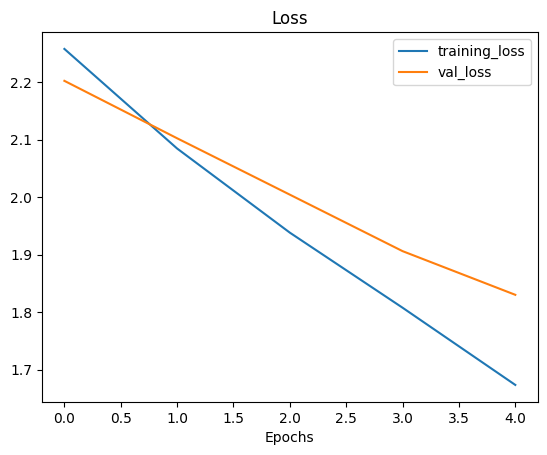

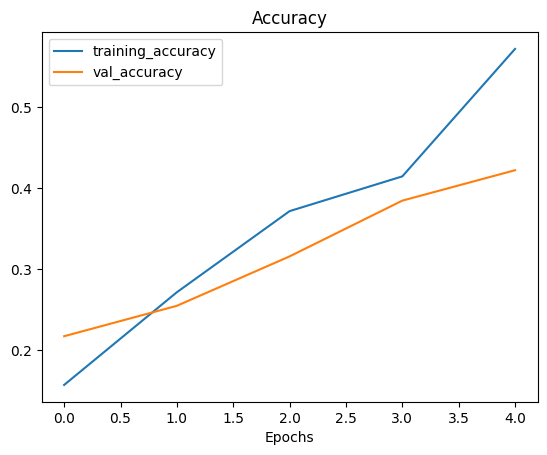

In [40]:
plot_loss_curves(history_1_1_percent)

The metrics on both datasets would improve if we kept training for more epochs.

## Model 2: Feature extraction transfer learning with 10% of data and data augmentation

We already downloaded the 10% data for the base model, we will use that also here.

###Preprocessing the data

In [41]:
# setting dir path
train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir_10_percent = "10_food_classes_10_percent/test/"

In [42]:
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode="categorical",
                                                                            batch_size=32,
                                                                            image_size=IMAGE_SIZE,
                                                                            )

test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir_10_percent,
                                                                           label_mode="categorical",
                                                                           batch_size=32,
                                                                           image_size=IMAGE_SIZE)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### Augmenting  the data

In [43]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
], name ="data_augmentation")


###Creating a ModelCheckpoint callback

In [44]:
# Setup checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt" # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=True, # save only the best model weights instead of a model every epoch
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)


### Creating the model_2

In [45]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="input_layer")

x = data_augmentation(inputs)

x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_2 = tf.keras.Model(inputs, outputs)

# Compile the model
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])


In [46]:
# Fit the model
initial_epochs = 5
history_2_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=initial_epochs,
                                          validation_data=test_data_10_percent,
                                          validation_steps=int(0.25 * len(test_data_10_percent)), # do less steps per validation (quicker)
                                          callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_data_aug"),
                                                     checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20230825-073448
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9859 - accuracy: 0.3760
Epoch 1: val_loss improved from inf to 1.53160, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 31s 911ms/step - loss: 1.9859 - accuracy: 0.3760 - val_loss: 1.5316 - val_accuracy: 0.6201
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3911 - accuracy: 0.6520
Epoch 2: val_loss improved from 1.53160 to 1.07418, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 21s 799ms/step - loss: 1.3911 - accuracy: 0.6520 - val_loss: 1.0742 - val_accuracy: 0.7467
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.1208 - accuracy: 0.7093
Epoch 3: val_loss improved from 1.07418 to 0.82494, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [=

In [47]:
# Evaluate on the test data
results_10_percent_data_aug = model_2.evaluate(test_data_10_percent)
results_10_percent_data_aug

79/79 [==============================] - 8s 92ms/step - loss: 0.6670 - accuracy: 0.8236


[0.6670432090759277, 0.8235999941825867]

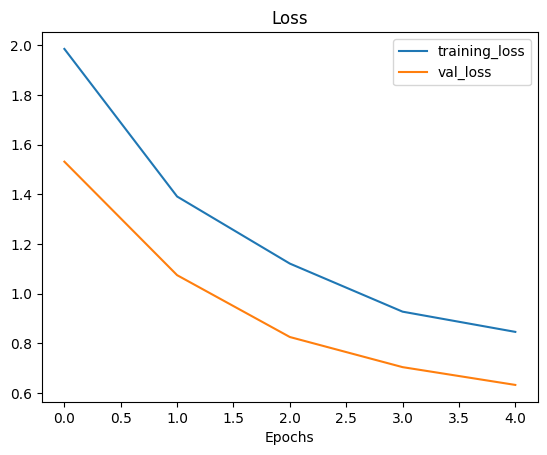

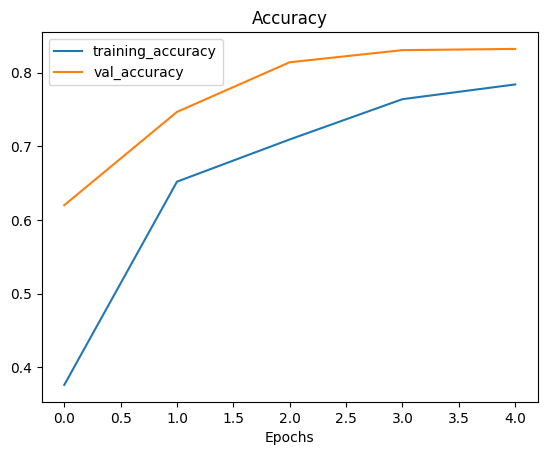

In [48]:
# Plot model loss curves
plot_loss_curves(history_2_10_percent_data_aug)

In [49]:
# Load in saved model weights and evaluate model
model_2.load_weights(checkpoint_path)
loaded_weights_model_results = model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 8s 100ms/step - loss: 0.6670 - accuracy: 0.8236


Now let's compare the results of our previously trained model and the loaded model. These results should very close if not exactly the same. The reason for minor differences comes down to the precision level of numbers calculated.

In [50]:
# If the results from our native model and the loaded weights are the same, this should output True
results_10_percent_data_aug == loaded_weights_model_results

False

If the above cell doesn't output True, it's because the numbers are close but not the exact same (due to how computers store numbers with degrees of precision).

results_10_percent_data_aug gives the accuracy of 0.840399 while loaded_weights_model_results gives 0.8404...

However, they should be very close...



In [51]:
import numpy as np
# Check to see if loaded model results are very close to native model results (should output True)
np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_results))


array([ True,  True])

Yeah..!!! Finally...!!

##Model 3: Fine-tuning an existing model on 10% of the data

High-level example of fine-tuning an EfficientNet model:  Bottom layers (layers closer to the input data) stay frozen where as top layers (layers closer to the output data) are updated during training.



In [53]:
# Layers in loaded model
model_2.layers

In [52]:
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name,  layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetv2-b0 False
3 global_average_pooling_layer True
4 output_layer True


We've got an input layer, a Sequential layer (the data augmentation model), a Functional layer (EfficientNetV2B0), a pooling layer and a Dense layer (the output layer).

In [54]:
model_2.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

 it looks like all of the layers in the efficientnetv2-b0 layer are frozen. We can confirm this using the trainable_variables attribute.

In [55]:
# Access the base_model layers of model_2
model_2_base_model = model_2.layers[2]
model_2_base_model.name

'efficientnetv2-b0'

In [56]:
# How many layers are trainable in our model_2_base_model?
print(len(model_2_base_model.trainable_variables))

0


We can even check layer by layer to see if the they're trainable.

To access the layers in model_2_base_model, we can use the layers attribute.

In [57]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(model_2_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

Now to fine-tune the base model to our own data, we're going to unfreeze the top 10 layers and continue training our model for another 5 epochs.

This means all of the base model's layers except for the last 10 will remain frozen and untrainable. And the weights in the remaining unfrozen layers will be updated during training.

In [58]:
# Make all the layers in model_2_base_model trainable
model_2_base_model.trainable = True

# Freeze all layers except for the last 10
for layer in model_2_base_model.layers[:-10]:
  layer.trainable = False

In [59]:
# Recompile the whole model (always recompile after any adjustments to a model)
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])


In [60]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(model_2_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

Nice! It seems all layers except for the last 10 are frozen and untrainable. This means only the last 10 layers of the base model along with the output layer will have their weights updated during training.

In [61]:
print(len(model_2.trainable_variables))


12


We're going to continue training on from where our previous model finished. Since it trained for 5 epochs, our fine-tuning will begin on the epoch 5 and continue for another 5 epochs.

To do this, we can use the initial_epoch parameter of the fit() method. We'll pass it the last epoch of the previous model's training history (history_10_percent_data_aug.epoch[-1]).

In [65]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data_10_percent,
                                               initial_epoch=history_2_10_percent_data_aug.epoch[-1], # start from previous last epoch
                                               validation_steps=int(0.25 * len(test_data_10_percent)),
                                               callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")])


Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20230825-074846
Epoch 5/10
24/24 [==============================] - 30s 719ms/step - loss: 0.6818 - accuracy: 0.8267 - val_loss: 0.5274 - val_accuracy: 0.8339
Epoch 6/10
24/24 [==============================] - 16s 638ms/step - loss: 0.6028 - accuracy: 0.8173 - val_loss: 0.4361 - val_accuracy: 0.8405
Epoch 7/10
24/24 [==============================] - 16s 656ms/step - loss: 0.5313 - accuracy: 0.8333 - val_loss: 0.4489 - val_accuracy: 0.8372
Epoch 8/10
24/24 [==============================] - 14s 541ms/step - loss: 0.5085 - accuracy: 0.8280 - val_loss: 0.4212 - val_accuracy: 0.8536
Epoch 9/10
24/24 [==============================] - 14s 561ms/step - loss: 0.4878 - accuracy: 0.8333 - val_loss: 0.4036 - val_accuracy: 0.8553
Epoch 10/10
24/24 [==============================] - 13s 519ms/step - loss: 0.4264 - accuracy: 0.8733 - val_loss: 0.4109 - val_accuracy: 0.8454


Ho ho, looks like our model has gained a few percentage points of accuracy! Let's evalaute it.



In [66]:
# Evaluate the model on the test data
results_fine_tune_10_percent = model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 9s 99ms/step - loss: 0.4550 - accuracy: 0.8432


We need a way to evaluate our model's performance before and after fine-tuning.

We will import compare_histories function from helper functions

In [67]:
from helper_functions import compare_historys

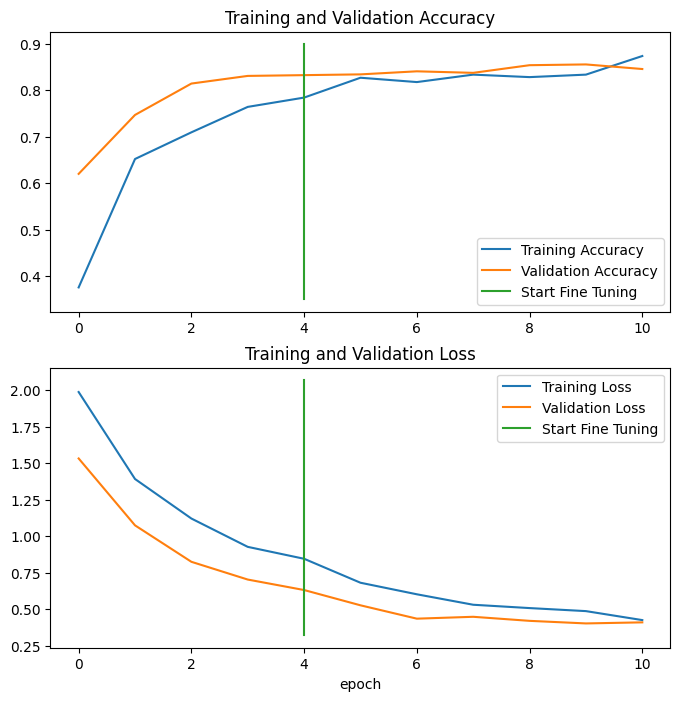

In [68]:
compare_historys(original_history=history_2_10_percent_data_aug,
                 new_history=history_fine_10_percent_data_aug,
                 initial_epochs=5)

## Model 4: Fine-tuning an existing model all of the data

We'll start by downloading the full version of our 10 food classes dataset.



In [69]:
# Download and unzip 10 classes of data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2023-08-25 07:55:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  20.4MB/s    in 24s     

2023-08-25 07:55:48 (20.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [70]:
# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [71]:
# How many images are we working with now?
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.

And now we'll turn the images into tensors datasets.



### Preprocessing the data

In [73]:
# Setup data inputs
import tensorflow as tf
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMAGE_SIZE)


Found 7500 files belonging to 10 classes.


In [74]:
test_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMAGE_SIZE)

Found 2500 files belonging to 10 classes.


As it is now, our model_2 has been fine-tuned on 10 percent of the data, so to begin fine-tuning on all of the data and keep our experiments consistent, we need to revert it back to the weights we checkpointed after 5 epochs of feature-extraction.

In [76]:
# Evaluate model (this is the fine-tuned 10 percent of data version)
model_2.evaluate(test_data_10_classes_full)

79/79 [==============================] - 10s 109ms/step - loss: 0.4550 - accuracy: 0.8432


[0.4550391733646393, 0.8432000279426575]

These are the same values as results_fine_tune_10_percent.



In [77]:
results_fine_tune_10_percent

[0.45503905415534973, 0.8432000279426575]

To keep our experiments clean, we'll load a create a new instance of model_2 using our create_base_model() function.

More specifically, we're trying to measure:

* Experiment 3 (previous one) - model_2 with 10 layers fine-tuned for 5 more epochs on 10% of the data.
* Experiment 4 (this one) - model_2 with layers fined-tuned for 5 more epochs on 100% on the data.
Importantly, both experiments should use the same test data (to keep evaluation the same).

And they should also start from the same checkpoint (model_2 feature extractor trained for 5 epochs on 10% of the data).

Let's first create new instance of model_2.

### Creating the model

In [85]:
def create_base_model(input_shape: tuple[int, int, int] = (224, 224, 3),
                      output_shape: int = 10,
                      learning_rate: float = 0.001,
                      training: bool = False) -> tf.keras.Model:
    """
    Create a model based on EfficientNetV2B0 with built-in data augmentation.

    Parameters:
    - input_shape (tuple): Expected shape of input images. Default is (224, 224, 3).
    - output_shape (int): Number of classes for the output layer. Default is 10.
    - learning_rate (float): Learning rate for the Adam optimizer. Default is 0.001.
    - training (bool): Whether the base model is trainable. Default is False.

    Returns:
    - tf.keras.Model: The compiled model with specified input and output settings.
    """

    # Create base model
    base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
    base_model.trainable = training

    # Setup model input and outputs with data augmentation built-in
    inputs = layers.Input(shape=input_shape, name="input_layer")
    x = data_augmentation(inputs)
    x = base_model(x, training=False)  # pass augmented images to base model but keep it in inference mode
    x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
    outputs = layers.Dense(units=output_shape, activation="softmax", name="output_layer")(x)
    model = tf.keras.Model(inputs, outputs)

    # Compile model
    model.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=["accuracy"])

    return model

In [86]:
model_2 = create_base_model(learning_rate=0.0001) # 10x lower learning rate for fine-tuning

And now to make sure it starts at the same checkpoint, we can load the checkpointed weights from checkpoint_path.



In [87]:
# Load previously checkpointed weights
model_2.load_weights(checkpoint_path)

Let's now get a summary and check how many trainable variables there are.



In [88]:
model_2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [89]:
print(len(model_2.trainable_variables))


2


Nice! This is the same as our original checkpoint.

And the results should be the same as results_10_percent_data_aug.

In [91]:
# After loading the weights, this should have gone down (no fine-tuning)
model_2.evaluate(test_data_10_classes_full)

79/79 [==============================] - 11s 93ms/step - loss: 0.6670 - accuracy: 0.8236


[0.6670432090759277, 0.8235999941825867]

Yeah, we're going to fine-tune the last 10 layers of the base model with the full dataset for another 5 epochs but first let's remind ourselves which layers are trainable.

In [92]:

# Check which layers are tuneable in the whole model
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)


0 input_layer True
1 data_augmentation True
2 efficientnetv2-b0 False
3 global_average_pooling_layer True
4 output_layer True


So let's unfreeze the last 10 layers of the base_model to make them trainable (for fine-tuning).



In [93]:
# Unfreeze the top 10 layers in model_2's base_model
model_2_base_model = model_2.layers[2]
model_2_base_model.trainable = True

# Freeze all layers except for the last 10
for layer in model_2_base_model.layers[:-10]:
  layer.trainable = False

In [94]:
# Check which layers are tuneable in the base model
for layer_number, layer in enumerate(model_2_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_7 False
1 rescaling_6 False
2 normalization_6 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [95]:
# Recompile the model (always recompile after any adjustments to a model)
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [96]:
# Continue to train and fine-tune the model to our data
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                           epochs=fine_tune_epochs,
                                           initial_epoch=history_2_10_percent_data_aug.epoch[-1],
                                           validation_data=test_data_10_classes_full,
                                           validation_steps=int(0.25 * len(test_data_10_classes_full)),
                                           callbacks=[create_tensorboard_callback("transfer_learning", "full_10_classes_fine_tune_last_10")])


Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20230825-081800
Epoch 5/10
235/235 [==============================] - 106s 401ms/step - loss: 0.7175 - accuracy: 0.7680 - val_loss: 0.3798 - val_accuracy: 0.8849
Epoch 6/10
235/235 [==============================] - 81s 341ms/step - loss: 0.6054 - accuracy: 0.8032 - val_loss: 0.3253 - val_accuracy: 0.9145
Epoch 7/10
235/235 [==============================] - 64s 270ms/step - loss: 0.5399 - accuracy: 0.8247 - val_loss: 0.3087 - val_accuracy: 0.9030
Epoch 8/10
235/235 [==============================] - 67s 275ms/step - loss: 0.5077 - accuracy: 0.8371 - val_loss: 0.2942 - val_accuracy: 0.9178
Epoch 9/10
235/235 [==============================] - 54s 223ms/step - loss: 0.4770 - accuracy: 0.8440 - val_loss: 0.2635 - val_accuracy: 0.9211
Epoch 10/10
235/235 [==============================] - 50s 209ms/step - loss: 0.4568 - accuracy: 0.8509 - val_loss: 0.2831 - val_accuracy: 0.9178


Let's evaluate on all of the test data.



In [98]:
results_fine_tune_full_data = model_2.evaluate(test_data_10_classes_full)
results_fine_tune_full_data

79/79 [==============================] - 8s 94ms/step - loss: 0.2809 - accuracy: 0.9088


[0.2808506488800049, 0.9088000059127808]

In [99]:
results_fine_tune_10_percent

[0.45503905415534973, 0.8432000279426575]

Nice! It looks like fine-tuning with all of the data has given our model a boost, how do the training curves look?



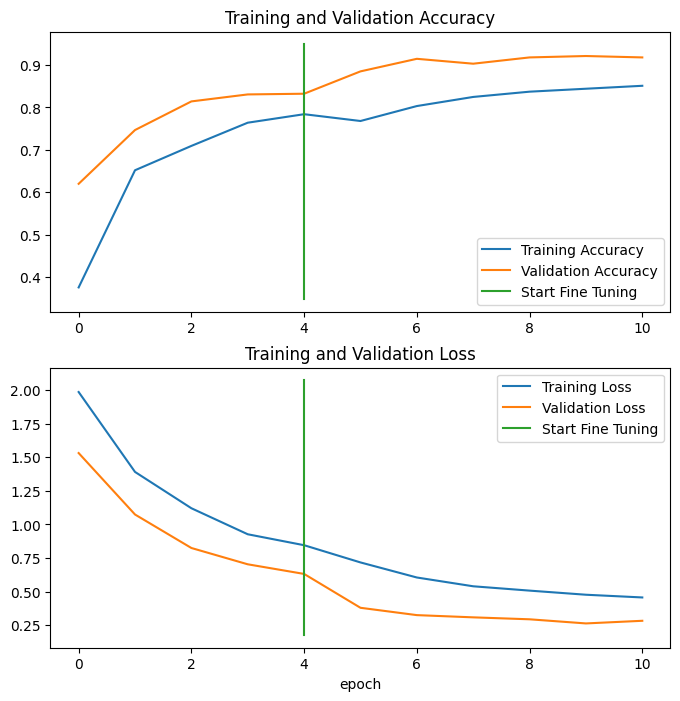

In [100]:
# How did fine-tuning go with more data?
compare_historys(original_history=history_2_10_percent_data_aug,
                 new_history=history_fine_10_classes_full,
                 initial_epochs=5)

# Viewing our experiment data on TensorBoard

In [102]:
# View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./transfer_learning \
  --name "Transfer learning experiments" \
  --description "A series of different transfer learning experiments with varying amounts of data and fine-tuning" \
  --one_shot # exits the uploader when upload has finished

2023-08-25 08:29:29.536697: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/h6lVWVYnTKGB8OsLp98Jrw/

[2023-08-25T08:29:32] Started scanning logdir.
[2023-08-25T08:29:40] Total uploaded: 162 scalars, 0 tensors, 5 binary objects (4.9 MB)
[2023-08-25T08:29:40] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/h6lVWVYnTKGB8OsLp98Jrw/


In [103]:
# View previous experiments
!tensorboard dev list

2023-08-25 08:29:43.994257: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
https://tensorboard.dev/experiment/h6lVWVYnTKGB8OsLp98Jrw/
	Name                 Transfer learning experiments
	Description          A series of different transfer learning experiments with varying amounts of data and fine-tuning
	Id                   h6lVWVYnTKGB8OsLp98Jrw
	Created              2023-08-25 08:29:32 (15 seconds ago)
	Updated              2023-08-25 08:29:40 (7 seconds ago)
	Runs                 10
	Tags                 5
	Scalars              162
	Tensor bytes         0
	Binary object bytes  5169976
https://tensorboard.dev/experiment/g9b4AZtnSaeUQGzKNs6XIw/
	Name                 Transfer learning experiments
	Description          A series of different transfer learning experiments with varying amounts of data and fine-tuning
	Id                   g9b4AZtnSaeUQGzKNs6XIw
	Created              2023-08-25 08:29:09 (38 seconds ago)
	Updated             

And if you want to remove a previous experiment (and delete it from public viewing) you can use the command:



In [104]:
# Remove previous experiments
# !tensorboard dev delete --experiment_id OUbW0O3pRqqQgAphVBxi8Q